In [15]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pickle
import scipy.sparse

#preprocessing and scoring
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from nltk.stem import WordNetLemmatizer

#models and algos
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

##customer pipeline function
from sklearn.base import BaseEstimator, TransformerMixin

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

In [16]:
# Load the dataset
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", header=None, encoding="ISO-8859-1")

# Rename columns
df.columns = ["polarity", "id", "date", "query", "user", "text"]

df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
df.head(10)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a b...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,loltrish hey long time no see yes rains a bit...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,tatiana_k nope they didnt have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,twittera que me muera


In [17]:
import nltk
nltk.download('stopwords')
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df = df[["polarity", "text"]]
#df["polarity"]  = df["polarity"].replace(0,1)
#df["polarity"]  = df["polarity"].replace(0,1)
df["polarity"] = df["polarity"].replace(4, 1)
print("train: ", len(df))

train:  1600000


<ipython-input-18-6656fc9c0048>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["polarity"] = df["polarity"].replace(4, 1)


<ipython-input-20-54147a21592f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="polarity", palette=custom_palette)


<Axes: xlabel='polarity', ylabel='count'>

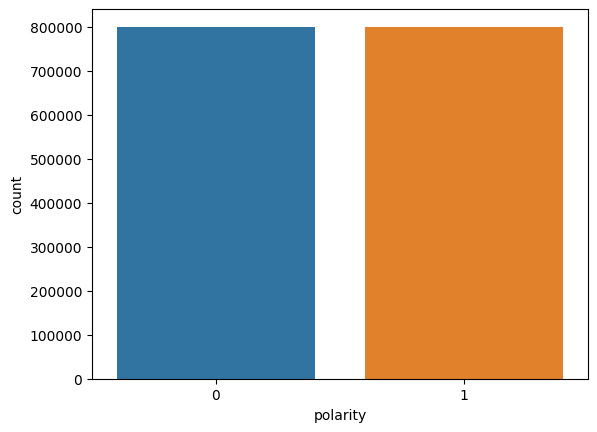

In [20]:
custom_palette = ["#1f77b4", "#ff7f0e"]

# Plot the countplot with the custom palette
sns.countplot(data=df, x="polarity", palette=custom_palette)

In [21]:
df["text"] = df["text"].astype(str)
df.reset_index(drop = True,inplace=True)

In [22]:
df["length"] = df["text"].apply(len)

In [37]:
df.groupby("polarity")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
polarity,,,,,,,,
0,800000.0,70.558421,35.103071,3.0,41.0,66.0,99.0,181.0
1,800000.0,69.689784,34.272403,4.0,41.0,65.0,97.0,189.0


<Figure size 1500x500 with 0 Axes>

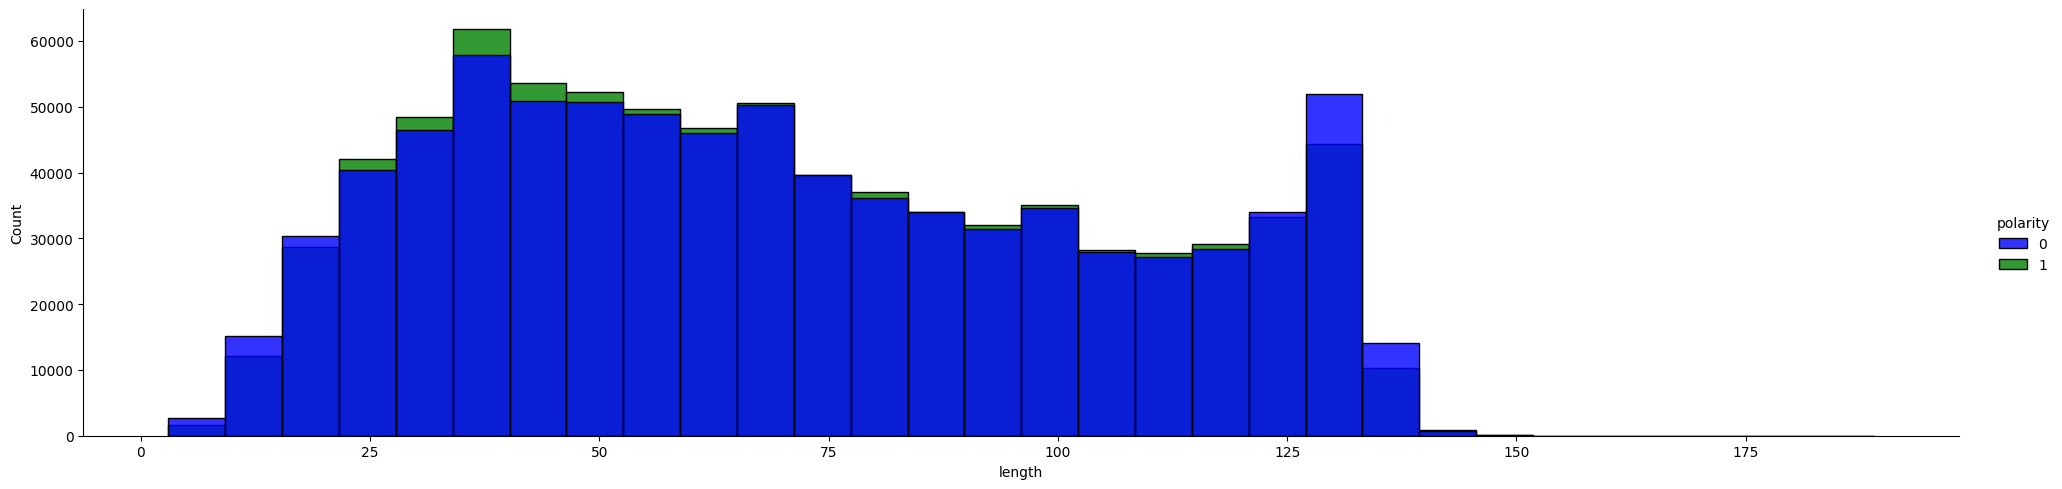

In [24]:
plt.figure(figsize=(15,5))

sns.displot(data = df, x= "length", hue= "polarity" ,palette={-1:"r",0:"b",1:"g"}, bins = 30,aspect= 4, alpha = 0.8)


In [25]:
def clean_text(text):
    pat1 = r'@[^ ]+'
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags and value
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [26]:
df["cleaned_tweet"] = df["text"].apply(clean_text)

In [27]:
#drop empty
df = df [ ~(df["cleaned_tweet"] =="")]

In [28]:
lem = WordNetLemmatizer()

def tokenize_lem(sentence):
    outlist= []
    token = sentence.split()
    for tok in token:
        outlist.append(lem.lemmatize(tok))
    return " ".join(outlist)

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
df["cleaned_tweet"] = df["cleaned_tweet"].apply(tokenize_lem)


In [31]:
df.head(10)

,polarity,text,length,cleaned_tweet
0,0,switchfoot httptwitpiccom2y1zl awww thats a b...,103,switchfoot httptwitpiccomyzl awww thats a bumm...
1,0,is upset that he cant update his facebook by t...,105,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...,86,kenichan i dived many time for the ball manage...
3,0,my whole body feels itchy and like its on fire,47,my whole body feel itchy and like it on fire
4,0,nationwideclass no its not behaving at all im ...,102,nationwideclass no it not behaving at all im m...
5,0,kwesidei not the whole crew,28,kwesidei not the whole crew
6,0,need a hug,11,need a hug
7,0,loltrish hey long time no see yes rains a bit...,89,loltrish hey long time no see yes rain a bit o...
8,0,tatiana_k nope they didnt have it,34,tatianak nope they didnt have it
9,0,twittera que me muera,23,twittera que me muera


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   polarity       1600000 non-null  int64 
 1   text           1600000 non-null  object
 2   length         1600000 non-null  int64 
 3   cleaned_tweet  1600000 non-null  object
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[["cleaned_tweet","length"]], df["polarity"], test_size=0.2, random_state=42)

TF-IDF vectorise the tweets

In [34]:
tfidf = TfidfVectorizer()

In [35]:
tfidf.fit(X_train["cleaned_tweet"])

TfidfVectorizer()

In [36]:
X_train_v = tfidf.transform(X_train["cleaned_tweet"])
X_test_v = tfidf.transform(X_test["cleaned_tweet"])

In [38]:
print(X_train_v.shape)
print(X_test_v.shape)

(1280000, 665216)
(320000, 665216)


Add TFIDF to tweets vector and Scaling

In [39]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

In [40]:
scaler.fit([X_train["length"]])
scaler2.fit([X_test["length"]])

MinMaxScaler()

In [41]:
X_train_len = scaler.transform([X_train["length"]])
X_train_len = X_train_len.reshape( X_train_v.shape[0], 1)

X_train = scipy.sparse.hstack([X_train_v,X_train_len], format = "csr")

In [42]:
X_test_len = scaler2.transform([X_test["length"]])
X_test_len = X_test_len.reshape(X_test_v.shape[0], 1)

X_test = scipy.sparse.hstack([X_test_v,X_test_len], format = "csr")

In [43]:
'''gen_params = {"alpha":[0.001,0.01,1,3,4,5]}
forest_params = {"n_estimators": [50, 100],
                 "max_depth" : [4, 6]
}

xgb_params = {
        'n_estimators': [50, 100],
        'max_depth': [4, 6],
        'eta': [0.5],
}

lnSVC_params = {
    "C": [0.01,1,3,4,5,10]
}
logr_params = {
    "penalty": ["l2" ,"l1", "none"],
    "C": [1,3,4,5],
    "max_iter": [1000,5000]
}'''

'gen_params = {"alpha":[0.001,0.01,1,3,4,5]}\nforest_params = {"n_estimators": [50, 100],\n                 "max_depth" : [4, 6]\n}\n\nxgb_params = {\n        \'n_estimators\': [50, 100],\n        \'max_depth\': [4, 6],\n        \'eta\': [0.5],\n}\n\nlnSVC_params = {\n    "C": [0.01,1,3,4,5,10]\n}\nlogr_params = {\n    "penalty": ["l2" ,"l1", "none"],\n    "C": [1,3,4,5],\n    "max_iter": [1000,5000]\n}'

In [44]:
kfold =StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

In [46]:
model_score = pd.DataFrame(columns=["model_f1_train","params_used", "f1","precision","recall"])


def model_prediction(model, params):

    model = GridSearchCV(model, param_grid= params, cv= kfold)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print ("Model and params: ", model.best_estimator_, model.best_params_)
    print("\n")
    print("Train score: ", model.best_score_)
    print("test score: ",accuracy_score(y_test,y_pred))
    print("\n")
    print("Test Report:")
    print(classification_report(y_test,y_pred))
    return y_pred, model


In [47]:
def model_scoring(y_pred, model):
    global y_test
    global model_score

    df = pd.DataFrame(data = [[model.best_score_,
                           model.best_params_,
                           f1_score(y_test,y_pred,average="macro"),
                           precision_score(y_test,y_pred,average="macro"),
                           recall_score(y_test,y_pred,average="macro")
                          ]] ,
                  columns =model_score.columns,
                  index=[str(model.best_estimator_)])
    model_score = model_score.append ( df )

In [48]:
#Set Parameters
gen_params = {"alpha":[1,3]}
xgb_params = {
        'n_estimators': [200],
        'max_depth': [6],
        'eta': [0.5],
}
lnSVC_params = {
    "C": [1]
}
logr_params = {
    "penalty": ["l2"],
    "C": [5],
    "max_iter": [100]
}
forest_params = {"n_estimators": [100],
                 "max_depth" : [6]
}

Run GridSearchCV

In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
#Instantiate
vader = SentimentIntensityAnalyzer()
#textblob does not required instantiation

logr_i = LogisticRegression(solver="sag")
ridge_i = RidgeClassifier()                 # L2 regularization
lnSVC_i = LinearSVC()
naivemulti_i = MultinomialNB()
naivebern_i = BernoulliNB()
xgb_i = XGBClassifier(#tree_method='gpu_hist'
                     )
rf_i = RandomForestClassifier()

In [51]:
log_pred , logr_m = model_prediction(logr_i,logr_params)
ridge_pred, ridge_m = model_prediction(ridge_i,{"alpha":[3]})
linSVC_pred, lnSVC_m = model_prediction(lnSVC_i, lnSVC_params)
naivemulti_pred, naivemulti_m = model_prediction(naivemulti_i, gen_params)
naivebern_pred, naivebern_m = model_prediction(naivebern_i, gen_params)
xgb_pred, xgb_m = model_prediction(xgb_i, xgb_params)
rf_pred, rf_m = model_prediction(rf_i,forest_params)

Model and params:  LogisticRegression(C=5, solver='sag') {'C': 5, 'max_iter': 100, 'penalty': 'l2'}


Train score:  0.7966578125626181
test score:  0.799090625


Test Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159494
           1       0.80      0.80      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Model and params:  RidgeClassifier(alpha=3) {'alpha': 3}


Train score:  0.7963656252835651
test score:  0.7993625


Test Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Model and params:  LinearSVC(C=1) {'C': 1

In [52]:
model_scoring(log_pred, logr_m)
model_scoring(ridge_pred, ridge_m)
model_scoring(linSVC_pred, lnSVC_m)
model_scoring(naivemulti_pred, naivemulti_m)
model_scoring(naivebern_pred, naivebern_m)
model_scoring(xgb_pred, xgb_m)
model_scoring(rf_pred, rf_m)

<ipython-input-47-7d7e0ce960c9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append ( df )
<ipython-input-47-7d7e0ce960c9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append ( df )
<ipython-input-47-7d7e0ce960c9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append ( df )
<ipython-input-47-7d7e0ce960c9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append ( df )
<ipython-input-47-7d7e0ce960c9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [53]:
model_score

,model_f1_train,params_used,f1,precision,recall
"LogisticRegression(C=5, solver='sag')",0.796658,"{'C': 5, 'max_iter': 100, 'penalty': 'l2'}",0.799078,0.799119,0.799074
RidgeClassifier(alpha=3),0.796366,{'alpha': 3},0.799323,0.799510,0.799326
LinearSVC(C=1),0.791708,{'C': 1},0.793975,0.793986,0.793972
MultinomialNB(alpha=3),0.770838,{'alpha': 3},0.771890,0.779217,0.773283
BernoulliNB(alpha=3),0.781679,{'alpha': 3},0.783690,0.784319,0.783837
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eta=0.5, eval_metric=None,\n feature_types=None, gamma=None, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=6,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=200,\n n_jobs=None, num_parallel_tree=None, ...)",0.784981,"{'eta': 0.5, 'max_depth': 6, 'n_estimators': 200}",0.786331,0.787278,0.786426
RandomForestClassifier(max_depth=6),0.684552,"{'max_depth': 6, 'n_estimators': 100}",0.692739,0.693263,0.692854


Out-the box models Textblob Vader

In [54]:
def out_box_textblob(x):
    x = TextBlob(x).sentiment[0]
    if x >0:
        x = 1
    elif x<0:
        x = -1
    else:
        x= 0
    return x

In [55]:
def out_box_vader(x):
    x = vader.polarity_scores(x)["compound"]
    if x >0:
        x = 1
    elif x<0:
        x = -1
    else:
        x= 0
    return x

In [56]:
def out_box_score(y_true, prediction, name):
    global model_score
    df = pd.DataFrame(data = [[0,
                               0,
                               f1_score(y_true,prediction,average="macro"),
                               precision_score(y_true,prediction,average="macro"),
                               recall_score(y_true,prediction,average="macro")
                              ]] ,
                      columns=model_score.columns,
                      index=[name])
    model_score = model_score.append ( df )

In [57]:
textblob_pred = df["cleaned_tweet"].apply(out_box_textblob)
vader_pred = df["cleaned_tweet"].apply(out_box_vader)

out_box_score(df["polarity"],vader_pred, "Vader")
out_box_score(df["polarity"],textblob_pred,"Textblob")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-56-c84bc4fe8883>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append ( df )
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-56-c84bc4fe8883>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score = model_score.append ( d

In [58]:
model_score

,model_f1_train,params_used,f1,precision,recall
"LogisticRegression(C=5, solver='sag')",0.796658,"{'C': 5, 'max_iter': 100, 'penalty': 'l2'}",0.799078,0.799119,0.799074
RidgeClassifier(alpha=3),0.796366,{'alpha': 3},0.799323,0.799510,0.799326
LinearSVC(C=1),0.791708,{'C': 1},0.793975,0.793986,0.793972
MultinomialNB(alpha=3),0.770838,{'alpha': 3},0.771890,0.779217,0.773283
BernoulliNB(alpha=3),0.781679,{'alpha': 3},0.783690,0.784319,0.783837
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eta=0.5, eval_metric=None,\n feature_types=None, gamma=None, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=6,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=200,\n n_jobs=None, num_parallel_tree=None, ...)",0.784981,"{'eta': 0.5, 'max_depth': 6, 'n_estimators': 200}",0.786331,0.787278,0.786426
RandomForestClassifier(max_depth=6),0.684552,"{'max_depth': 6, 'n_estimators': 100}",0.692739,0.693263,0.692854
Vader,0.000000,0,0.318699,0.375676,0.288149
Textblob,0.000000,0,0.344134,0.389397,0.309511


Save all models & vocab

In [59]:
model_dict = {
    logr_m : "logr_m",
    ridge_m:"ridge_m",lnSVC_m:"lnSVC_m", naivemulti_m:"naivemulti_m", naivebern_m:"naivebern_m"
    #,xgb_m:"xgb_m"
    #,rf_m: "rf_m"
             }
for m in model_dict.items():
    file = open(f'{m[1]}.pickle','wb')
    pickle.dump(m[0], file)
    file.close()

In [60]:
model_dict = {
    logr_m : "logr_m",
    ridge_m:"ridge_m",lnSVC_m:"lnSVC_m", naivemulti_m:"naivemulti_m", naivebern_m:"naivebern_m"
    #,xgb_m:"xgb_m"
    #,rf_m: "rf_m"
             }
for m in model_dict.items():
    file = open(f'{m[1]}.pickle','wb')
    pickle.dump(m[0], file)
    file.close()

Voting Classifier Option ensemble

In [61]:
"""#from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([("logr_m",logr_m), ("ridge_m",ridge_m), ("lnSVC_m",lnSVC_m),
                       #("ridge_m",ridge_m),
                       ("naivemulti_m",naivemulti_m),
                       ("naivebern_m",naivebern_m),
                       ("rf_m",xgb_m)],
                      voting = "hard")"""

'#from sklearn.ensemble import VotingClassifier\nvc = VotingClassifier([("logr_m",logr_m), ("ridge_m",ridge_m), ("lnSVC_m",lnSVC_m), \n                       #("ridge_m",ridge_m),\n                       ("naivemulti_m",naivemulti_m),\n                       ("naivebern_m",naivebern_m),\n                       ("rf_m",xgb_m)],\n                      voting = "hard")'

In [62]:
from sklearn.pipeline import Pipeline

X = df["cleaned_tweet"]
y = df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
pipe = Pipeline(steps = [
    ("tfidf", TfidfVectorizer()),
    ("xgb" , GridSearchCV(xgb_i, param_grid= xgb_params, cv= kfold))
]
               )


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#error_score='raise'
pipe.fit(X,y)

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [65]:
file = open('pipemodel_model.pickle','wb')
pickle.dump(pipe, file)
file.close()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

Optimal number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    9999
1       1
Name: cluster_label, dtype: int64


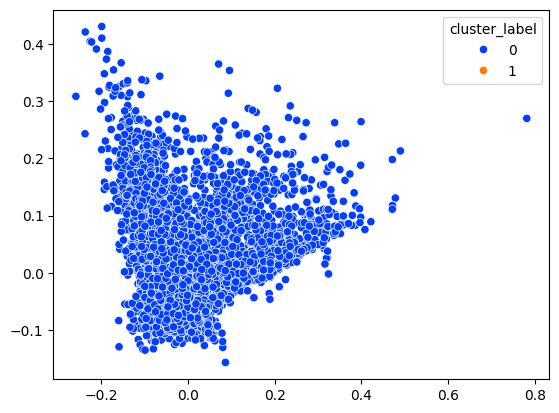

In [66]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Sample a smaller subset of the data for clustering
df_sample = df.sample(n=10000, random_state=42)

# Vectorize the preprocessed tweets
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df_sample['cleaned_tweet'])

# Scale the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

# Determine the optimal number of clusters using silhouette score
max_k = 10
sil_scores = []
for k in range(2, max_k+1):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42).fit(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

optimal_k = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

# Perform MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42).fit(X_scaled)

# Add the cluster labels as a new column to the dataframe
df_sample["cluster_label"] = kmeans.labels_

# Print the size of each cluster
print(df_sample["cluster_label"].value_counts())

# Visualize the clusters using scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2).fit_transform(X.toarray())
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=df_sample["cluster_label"], palette="bright")
plt.show()